In [236]:
# Colab 폴더로 경로 이동
%cd /content/drive/MyDrive/Colab Notebooks/DeepLearning

/content/drive/MyDrive/Colab Notebooks/DeepLearning


# K-Means 분할적 군집화
---
- 지정된 K만큼 임의의 중심점(Centroid)를 지정
- 중심점(Centroid)를 기준으로 가까운 거리에 있는 데이터를 하나의 군집으로 묶기
- 군집마다 다시 중심점(Centroid) 계산
- 중심점(Centroid)이동이 더 이상 변경되지 않을 때까지 반복하는 방법


## [1] 데이터 로딩 및 준비

In [237]:
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np

In [238]:
iris = load_iris()

In [239]:
# 비지도 학습이라 target 불필요
data = iris.data
target = iris.target
data.shape

(150, 4)

In [240]:
iris.feature_names[:2]

['sepal length (cm)', 'sepal width (cm)']

In [241]:
data = data[:,:2]
data.shape

(150, 2)

# [2] 데이터처리

In [242]:
cluster = KMeans(n_clusters=2)

In [243]:
cluster.fit(data)

KMeans(n_clusters=2)

In [244]:
# cluster 객체 속성 확인
print(f'cluster_centers : {cluster.cluster_centers_}')
print(f'labels_ : {cluster.labels_}')
print(f'labels_ : {np.unique(cluster.labels_, return_counts =True)}')

cluster_centers : [[6.61044776 2.96567164]
 [5.22409639 3.1313253 ]]
labels_ : [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 1 0 1 1 0 1 1 0 0 0
 0 0 0 0 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 1 0 0 0 0
 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0
 0 1]
labels_ : (array([0, 1], dtype=int32), array([67, 83]))


In [245]:
# 샘플데이터 => 결정된 군집으로 변환 
data_k = cluster.transform(data)

In [246]:
data_k

array([[1.60217328, 0.38899993],
       [1.71079221, 0.34969244],
       [1.92476503, 0.52857661],
       [2.01493035, 0.62488205],
       [1.73087101, 0.5194951 ],
       [1.52910211, 0.78854478],
       [2.05682798, 0.67947214],
       [1.66798774, 0.34986466],
       [2.21142309, 0.85594757],
       [1.71571433, 0.32560673],
       [1.41577608, 0.59525876],
       [1.86181691, 0.50203968],
       [1.81077319, 0.44396405],
       [2.31070277, 0.9333812 ],
       [1.31402463, 1.04223832],
       [1.6988858 , 1.35499806],
       [1.52910211, 0.78854478],
       [1.60217328, 0.38899993],
       [1.23491657, 0.82073754],
       [1.72555969, 0.68009247],
       [1.28601124, 0.32113576],
       [1.67949117, 0.58205741],
       [2.10814437, 0.78048208],
       [1.54700611, 0.20940646],
       [1.86181691, 0.50203968],
       [1.61081359, 0.25974127],
       [1.66798774, 0.34986466],
       [1.50826711, 0.36946132],
       [1.47580622, 0.26975309],
       [1.92476503, 0.52857661],
       [1.

# 시각화 
---

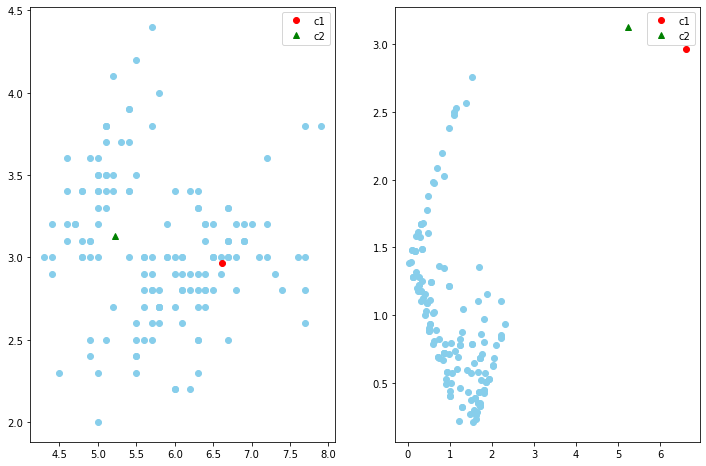

In [247]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.scatter(data[:,0],data[:,1],c='skyblue')
plt.plot(cluster.cluster_centers_[0][0],cluster.cluster_centers_[0][1], 'ro',label='c1')
plt.plot(cluster.cluster_centers_[1][0],cluster.cluster_centers_[1][1], 'g^',label='c2')
plt.legend()

plt.subplot(1,2,2)
plt.scatter(data_k[:,0],data_k[:,1],c='skyblue')
plt.plot(cluster.cluster_centers_[0][0],cluster.cluster_centers_[0][1], 'ro',label='c1')
plt.plot(cluster.cluster_centers_[1][0],cluster.cluster_centers_[1][1], 'g^',label='c2')
plt.legend()
plt.show()


# 최적 k값 찾기
---

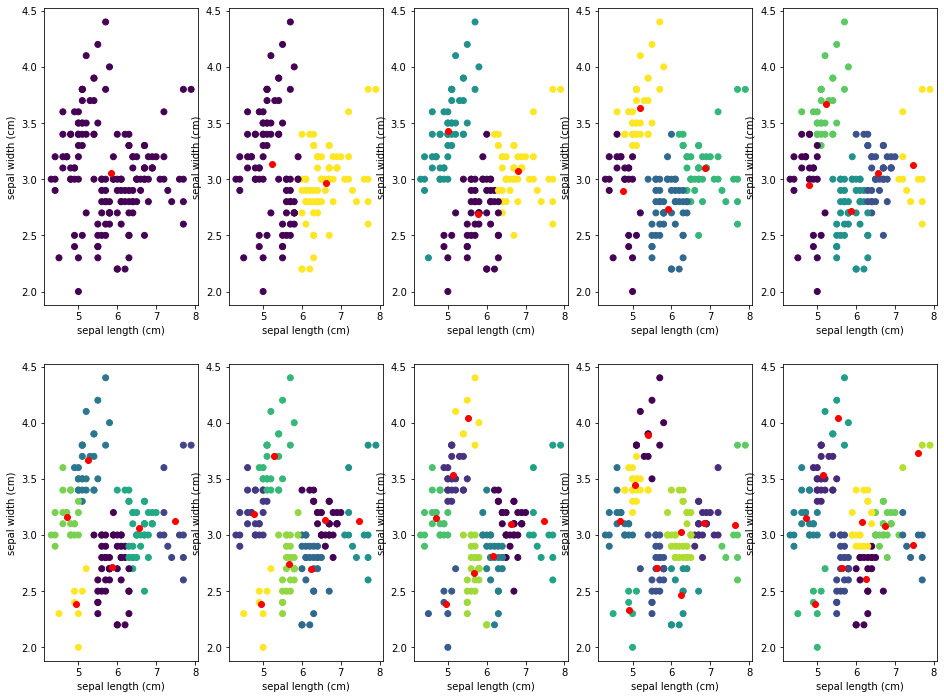

In [248]:
# k 값 늘려가며 반복테스트
plt.figure(figsize=(16,12))
for i in range(1,11):
  cluster = KMeans(n_clusters = i)
  cluster.fit(data)
  
  plt.subplot(2,5,i)
  plt.scatter(data[:,0],data[:,1],c=cluster.labels_)
  
  for x in range(0,i):
    plt.plot(cluster.cluster_centers_[x][0],cluster.cluster_centers_[x][1],'ro')
  plt.xlabel('sepal length (cm)')
  plt.ylabel('sepal width (cm)')
  #data = cluster.transform(data)
plt.show()

# 그래프 확인

# 군집화 이후 작업
---
- 라벨과 데이터를 가지고 지도학습 분류로 성능 체크

In [249]:
from sklearn.linear_model import LogisticRegression

In [250]:
# 군집화로 생성된 데이터
target = cluster.labels_.reshape(-1,1)
target.shape, data.shape

((150, 1), (150, 2))

In [251]:
cluster_3 = KMeans(n_clusters=2)
cluster_3.fit(data)

KMeans(n_clusters=2)

In [252]:
lrModel=LogisticRegression(max_iter=500)
lrModel.fit(data,cluster_3.labels_)

LogisticRegression(max_iter=500)

In [253]:
lrModel.score(data,cluster_3.labels_)

1.0

In [254]:
pre_label = lrModel.predict(data)
pre_label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int32)

In [255]:
plt.scatter(pre_label[:,0],pre_label[:,1])
plt.plot(cluster.labels_, 'b-')
plt.axis([0,150,0,3])
plt.show()

IndexError: ignored